**(1) Data Description:**
The data set is given as two .csv files, players.csv and sessions.csv.
There are 196 observations in players.csv and 1535 observations in sessions.csv.

There are 7 variables in players.csv.
* experience
    - Describes the expertise levels of players
    - Character type variable
    - 5 possible values: Beginner, Amateur, Regular, Veteran, Pro
* subscribe
    - Logical variable
        + True or false
* hashedEmail
* played_hours
    - Number of hours played
    - Double variable
* name
    - First name of player
    - Character variable
* gender
    - Character variable
* Age
    - Age of players in years
    - Double variable
    - Values given as integers

and 5 variables in sessions.csv.
* hashed_email
* start_time and end_time
    * Character variable
    * Given in DD/MM/YYYY HH:MM
* original_start_time and original_end_time
    * Double variable
    * The start time in milliseconds since 1 January, 1970.

Summaries:
* The average hours played is 5.85 hours. 
* The average player age is 21.14 years. 
* The average time taken in each session was 50.86 minutes.

Issues:

The names are not particularly useful and can be removed. The hashed email may be useful for connecting the sessions and player data but are not human readable. The names are also all unique. Using original start and end time may yield more human unreadable results. These values are precise but not easily understood without manipulation.

**(2) Questions:**

Can age and played hours predict experience in players.csv?

The data will help to answer the question because the value of age, played hours, and experience levels are given.

The data can be wrangled by converting experience into a factor. This will help with both the visualization and the classification, which if the predictive method that will be applied.

**(3) Exploratory Data Analysis and Visualization:**

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
players <- read_csv("https://raw.githubusercontent.com/jasmine-z08/individual-planning-stage-project/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/jasmine-z08/individual-planning-stage-project/refs/heads/main/sessions.csv")
players # calling each will show the dimensions of the data set and will tell use the number of variables and observations
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


**Table of Mean Values in players.csv**

In [11]:
players_mean <- players |>
    select(played_hours, Age) |>
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE), mean_age = mean(Age, na.rm = TRUE))
players_mean

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


**Table of Mean Session Time in players.csv**

In [22]:
sessions |> 
  mutate(start_dt = dmy_hm(start_time), # with a bit of research, using lubridate in tidyverse to convert the variables into workable times
    end_dt   = dmy_hm(end_time),
    duration = as.numeric(end_dt - start_dt, units = "mins")) |>   # duration in minutes
  summarize(average_duration_minutes = mean(duration, na.rm = TRUE))

average_duration_minutes
<dbl>
50.85845


**Wrangling players.csv**

In [35]:
players_wrangle <- players |>
    mutate(experience = as.factor(experience)) |> # make the experience column into a factor variable. 
    select(experience, played_hours, Age) # remove unnecessary columns
head(players_wrangle)

experience,played_hours,Age
<fct>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
Amateur,0.7,21
Regular,0.1,21
Amateur,0.0,17


**Visualizations**

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


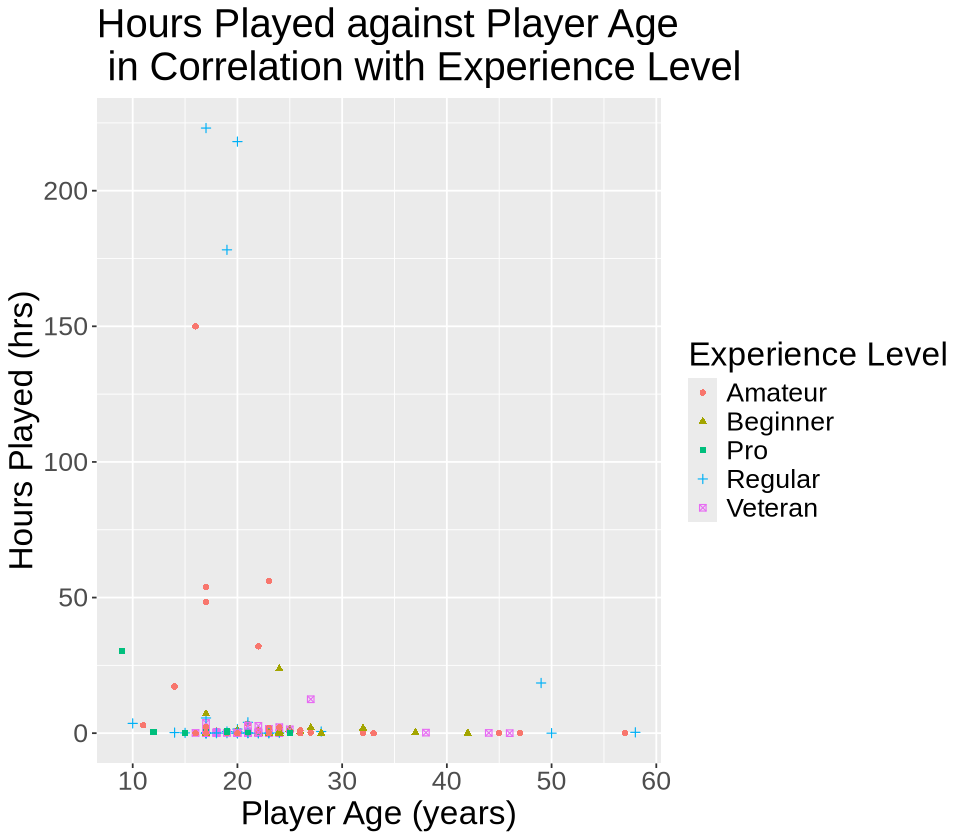

In [43]:
options(repr.plot.width=8, repr.plot.height=7)

players_plot <- players_wrangle |>
    ggplot(aes(x = Age, y = played_hours, color = experience, shape = experience)) + 
    geom_point() +
    labs(x = "Player Age (years)", y = "Hours Played (hrs)", color = "Experience Level", shape = "Experience Level") +
 theme(text = element_text(size=20)) +
    ggtitle("Hours Played against Player Age \n in Correlation with Experience Level")
players_plot

This plot gives some insight into how viable our question is. We can see that there is no clear relationship between player age and hours played. As a result, it may be difficult to find and predict experience levels based on two variables which themselves seem unrelated.

**(4) Methods and Plan:**

I propose using KNN classification to predict experience level based on age and played hours. Experience is treated as a categorical (factor) variable. This allows the model to classify players into discrete one of five experience levels based on their age and their hours played.

This method is most apprpriate in the context of what we know in this couse because we are trying to predict a categorical variable, as opposed to a numerical variable which would require regression techniques. 

Potential limitations include over or underfitting. This may be a problem especially because of the unclear nature of the relationships between our three relevant variables. Another limitation is an imbalance in categories. For example, if there are many more beginners than veterans, the model may underperform in predicting veterans.

Cross-validation (for example, 5-fold) will be used to counter over and underfitting and maximize model performance. We will evaluate accuracy and confusion matrices to compare models.

To process the data, we convert experience into a categorical/factor variable. We will split the data by a ratio of 75% training data and 25% testing data in 5 splits. We will split the data in the next stage, when we begin to perform predictive analysis (not just visualization and summary). We will use cross-validation.

**(5) GitHub Repository**

https://github.com/jasmine-z08/individual-planning-stage-project